# Financial Planning with APIs and Simulations

In this Challenge, you’ll create two financial analysis tools by using a single Jupyter notebook:

Part 1: A financial planner for emergencies. The members will be able to use this tool to visualize their current savings. The members can then determine if they have enough reserves for an emergency fund.

Part 2: A financial planner for retirement. This tool will forecast the performance of their retirement portfolio in 30 years. To do this, the tool will make an Alpaca API call via the Alpaca SDK to get historical price data for use in Monte Carlo simulations.

You’ll use the information from the Monte Carlo simulation to answer questions about the portfolio in your Jupyter notebook.



In [1]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load the environment variables from the .env file
#by calling the load_dotenv function
load_dotenv()

True

## Part 1: Create a Financial Planner for Emergencies

### Evaluate the Cryptocurrency Wallet by Using the Requests Library

In this section, you’ll determine the current value of a member’s cryptocurrency wallet. You’ll collect the current prices for the Bitcoin and Ethereum cryptocurrencies by using the Python Requests library. For the prototype, you’ll assume that the member holds the 1.2 Bitcoins (BTC) and 5.3 Ethereum coins (ETH). To do all this, complete the following steps:

1. Create a variable named `monthly_income`, and set its value to `12000`.

2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplies.

3. Navigate the JSON response object to access the current price of each coin, and store each in a variable.

    > **Hint** Note the specific identifier for each cryptocurrency in the API JSON response. The Bitcoin identifier is `1`, and the Ethereum identifier is `1027`.

4. Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.



In [3]:
# The current number of coins for each cryptocurrency asset held in the portfolio.
btc_coins = 1.2
eth_coins = 5.3

#### Step 1: Create a variable named `monthly_income`, and set its value to `12000`.

In [4]:
# The monthly amount for the member's household income

monthly_income = 12000

#### Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [5]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets

btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

#### Step 2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplied.

In [6]:
# Using the Python requests library, make an API call to access the current price of BTC

btc_response = requests.get(btc_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable

print(json.dumps(btc_response, indent=2, sort_keys=True))

{
  "data": {
    "1": {
      "circulating_supply": 19351487,
      "id": 1,
      "last_updated": 1681983595,
      "max_supply": 21000000,
      "name": "Bitcoin",
      "quotes": {
        "USD": {
          "market_cap": 558774300967,
          "percent_change_1h": 0.124559894534194,
          "percent_change_24h": -1.33630740765678,
          "percent_change_7d": -3.36704001279087,
          "percentage_change_1h": 0.124559894534194,
          "percentage_change_24h": -1.33630740765678,
          "percentage_change_7d": -3.36704001279087,
          "price": 28897.0,
          "volume_24h": 20306799014
        }
      },
      "rank": 1,
      "symbol": "BTC",
      "total_supply": 19351487,
      "website_slug": "bitcoin"
    }
  },
  "metadata": {
    "error": null,
    "num_cryptocurrencies": 3119,
    "timestamp": 1681983595
  }
}


In [7]:
# Using the Python requests library, make an API call to access the current price ETH

eth_response = requests.get(eth_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable

print(json.dumps(eth_response, indent=2, sort_keys=True))

{
  "data": {
    "1027": {
      "circulating_supply": 120428890,
      "id": 1027,
      "last_updated": 1681983593,
      "max_supply": 120428890,
      "name": "Ethereum",
      "quotes": {
        "USD": {
          "market_cap": 235602856402,
          "percent_change_1h": 0.266862205117995,
          "percent_change_24h": -1.41461231631537,
          "percent_change_7d": 1.98710636258403,
          "percentage_change_1h": 0.266862205117995,
          "percentage_change_24h": -1.41461231631537,
          "percentage_change_7d": 1.98710636258403,
          "price": 1958.38,
          "volume_24h": 13554311851
        }
      },
      "rank": 2,
      "symbol": "ETH",
      "total_supply": 120428890,
      "website_slug": "ethereum"
    }
  },
  "metadata": {
    "error": null,
    "num_cryptocurrencies": 3119,
    "timestamp": 1681983593
  }
}


#### Step 3: Navigate the JSON response object to access the current price of each coin, and store each in a variable.

In [8]:
# Navigate the BTC response object to access the current price of BTC

btc_price = btc_response['data']["1"]['quotes']['USD']['price']

# Print the current price of BTC

display(btc_price)

28897.0

In [9]:
# Navigate the BTC response object to access the current price of ETH

eth_price = eth_response['data']['1027']['quotes']['USD']['price']

# Print the current price of ETH

display(eth_price)

1958.38

### Step 4: Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.

In [10]:
# Compute the current value of the BTC holding 

btc_value = btc_coins * btc_price

# Print current value of your holding in BTC

display(btc_value)

34676.4

In [11]:
# Compute the current value of the ETH holding 
eth_value = eth_coins * eth_price

# Print current value of your holding in ETH
display(eth_value)

10379.414

In [12]:
# Compute the total value of the cryptocurrency wallet
# Add the value of the BTC holding to the value of the ETH holding

total_crypto_wallet = btc_value + eth_value

# Print current cryptocurrency wallet balance

display(total_crypto_wallet)

45055.814

### Evaluate the Stock and Bond Holdings by Using the Alpaca SDK

In this section, you’ll determine the current value of a member’s stock and bond holdings. You’ll make an API call to Alpaca via the Alpaca SDK to get the current closing prices of the SPDR S&P 500 ETF Trust (ticker: SPY) and of the iShares Core US Aggregate Bond ETF (ticker: AGG). For the prototype, assume that the member holds 110 shares of SPY, which represents the stock portion of their portfolio, and 200 shares of AGG, which represents the bond portion. To do all this, complete the following steps:

1. In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

2. Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

3. Set the following parameters for the Alpaca API call:

    - `tickers`: Use the tickers for the member’s stock and bond holdings.

    - `timeframe`: Use a time frame of one day.

    - `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.

4. Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

5. Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

6. Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.


#### Review the total number of shares held in both (SPY) and (AGG).

In [13]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.

spy_shares = 110
agg_shares = 200

#### Step 1: In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

#### Step 2: Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

In [14]:
# Set the variables for the Alpaca API and secret keys

alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca tradeapi.REST object

alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

#### Step 3: Set the following parameters for the Alpaca API call:

- `tickers`: Use the tickers for the member’s stock and bond holdings.

- `timeframe`: Use a time frame of one day.

- `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.


In [15]:
# Set the tickers for both the bond and stock portion of the portfolio

tickers = ["SPY", "AGG"]

# Set timeframe to 1Day

timeframe = "1Day"

# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
# This will give you the closing price of the previous trading day
# Alternatively you can use a start and end date of 2020-08-07
           
start_date = pd.Timestamp("2020-08-10", tz="America/New_York").isoformat()
end_date   = pd.Timestamp("2020-08-10", tz="America/New_York").isoformat()

#### Step 4: Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

In [16]:
# Use the Alpaca get_bars function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame

prices_df = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Reorganize the DataFrame
# Separate ticker data

SPY = prices_df[prices_df['symbol']=='SPY'].drop('symbol', axis=1)
AGG = prices_df[prices_df['symbol']=='AGG'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames

prices_df = pd.concat([SPY, AGG], axis=1, keys=["SPY", "AGG"])

# Review the first 5 rows of the Alpaca DataFrame

display(prices_df.head())

SPY                                     \
                             open    high      low   close    volume   
timestamp                                                              
2020-08-10 04:00:00+00:00  335.06  335.77  332.955  335.56  44268089   

                                                     AGG                   \
                          trade_count       vwap    open     high     low   
timestamp                                                                   
2020-08-10 04:00:00+00:00      284606  334.98421  119.62  119.635  119.28   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2020-08-10 04:00:00+00:00  119.32  5152700       16679  119.403983

#### Step 5: Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

In [17]:
# Access the closing price for AGG from the Alpaca DataFrame
# Converting the value to a floating point number

agg_close_price = float(prices_df['AGG']["close"])

# Print the AGG closing price

display(agg_close_price)

119.32

In [18]:
# Access the closing price for SPY from the Alpaca DataFrame
# Converting the value to a floating point number

spy_close_price = float(prices_df['SPY']["close"])

# Print the SPY closing price

display(spy_close_price)

335.56

#### Step 6: Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.

In [19]:
# Calculate the current value of the bond portion of the portfolio
agg_value = agg_shares * agg_close_price 

# Print the current value of the bond portfolio

display(agg_value)

23864.0

In [20]:
# Calculate the current value of the stock portion of the portfolio

spy_value = spy_shares * spy_close_price 

# Print the current value of the stock portfolio

display(spy_value)

36911.6

In [21]:
# Calculate the total value of the stock and bond portion of the portfolio

total_stocks_bonds = spy_value + agg_value

# Print the current balance of the stock and bond portion of the portfolio

display(total_stocks_bonds)

60775.6

In [22]:
# Calculate the total value of the member's entire savings portfolio
# Add the value of the cryptocurrency walled to the value of the total stocks and bonds

total_portfolio = total_crypto_wallet + total_stocks_bonds

# Print current cryptocurrency wallet balance

display(total_portfolio)

105831.41399999999

### Evaluate the Emergency Fund

In this section, you’ll use the valuations for the cryptocurrency wallet and for the stock and bond portions of the portfolio to determine if the credit union member has enough savings to build an emergency fund into their financial plan. To do this, complete the following steps:

1. Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

2. Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

    - `savings_data`: Use the list that you just created.

    - `columns`: Set this parameter equal to a Python list with a single value called `amount`.

    - `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.

3. Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

4. Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

    1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of $12000. (You set this earlier in Part 1).

    2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

        1. If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

        2. Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

        3. Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


#### Step 1: Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

In [23]:
# Consolidate financial assets data into a Python list

savings_data = [total_crypto_wallet, total_stocks_bonds]

# Review the Python list savings_data

display(savings_data)

[45055.814, 60775.6]

#### Step 2: Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

- `savings_data`: Use the list that you just created.

- `columns`: Set this parameter equal to a Python list with a single value called `amount`.

- `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.


In [24]:
# Create a Pandas DataFrame called savings_df 

savings_df = pd.DataFrame(savings_data, columns=['amount'], index = ['crypto', 'stock/bond'])

# Display the savings_df DataFrame

display(savings_df.head())


,amount
crypto,45055.814
stock/bond,60775.600


#### Step 3: Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

<AxesSubplot:title={'center':'Portfolio Value - 2020-08-10'}, ylabel='amount'>

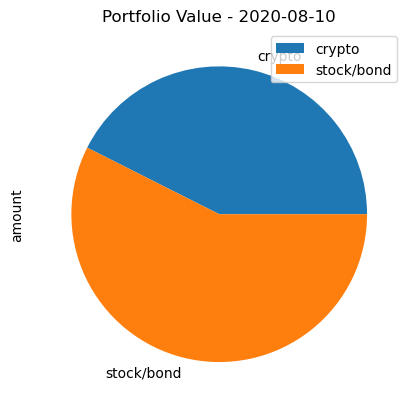

In [25]:
# Plot the total value of the member's portfolio (crypto and stock/bond) in a pie chart

savings_df.plot.pie(y = 'amount', title='Portfolio Value - 2020-08-10')

#### Step 4: Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

Step 1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

Step 2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


##### Step 4-1: Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

In [26]:
# Create a variable named emergency_fund_value

monthly_income = 12000

emergency_fund_value = 3 * monthly_income

##### Step 4-2: Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)

In [27]:
# Evaluate the possibility of creating an emergency fund with 3 conditions:

if total_portfolio > emergency_fund_value:
    print("You have more than enough in your Emergency Fund")
elif total_portfolio == emergency_fund_value:
    print("You have enough in your Emergency Fund")
else:
    print("You DO NOT have than enough in your Emergency Fund, your are short:", total_portfolio - emergency_fund_value)

You have more than enough in your Emergency Fund


## Part 2: Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation

In this section, you’ll use the MCForecastTools library to create a Monte Carlo simulation for the member’s savings portfolio. To do this, complete the following steps:

1. Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

2. Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.The following image shows the overlay line plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the resulting plot.](Images/5-4-monte-carlo-line-plot.png)

3. Plot the probability distribution of the Monte Carlo simulation. Plot the probability distribution of the Monte Carlo simulation. The following image shows the histogram plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the histogram plot.](Images/5-4-monte-carlo-histogram.png)

4. Generate the summary statistics for the Monte Carlo simulation.



#### Step 1: Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [28]:
# Set start and end dates of 3 years back from your current date
# Alternatively, you can use an end date of 2020-08-07 and work 3 years back from that date 

start_date = pd.Timestamp("2019-08-10", tz="America/New_York").isoformat()
end_date   = pd.Timestamp("2022-08-10", tz="America/New_York").isoformat()

In [29]:
# Use the Alpaca get_bars function to make the API call to get the 3 years worth of pricing data
# The tickers and timeframe parameters should have been set in Part 1 of this activity 
# The start and end dates should be updated with the information set above
# Remember to add the df property to the end of the call so the response is returned as a DataFrame

prices_df = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
    
).df

# Reorganize the DataFrame
# Separate ticker data

SPY = prices_df[prices_df['symbol']=='SPY'].drop('symbol', axis=1)
AGG = prices_df[prices_df['symbol']=='AGG'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames

prices_df = pd.concat([SPY, AGG], axis=1, keys=["SPY", "AGG"])

# Display both the first and last five rows of the DataFrame

prices_df

SPY                                         \
                             open      high       low   close     volume   
timestamp                                                                  
2019-08-12 04:00:00+00:00  289.96  291.6052  287.0200  288.07   60895115   
2019-08-13 04:00:00+00:00  287.74  294.1500  287.3600  292.42  100693314   
2019-08-14 04:00:00+00:00  288.07  292.4644  283.7600  284.02  136293807   
2019-08-15 04:00:00+00:00  284.88  285.6400  282.3900  284.65  102128101   
2019-08-16 04:00:00+00:00  286.48  289.3300  284.7138  288.81   86075298   
...                           ...       ...       ...     ...        ...   
2022-08-04 04:00:00+00:00  414.37  415.0900  412.4400  414.17   45565581   
2022-08-05 04:00:00+00:00  409.66  414.1500  409.6000  413.47   56751151   
2022-08-08 04:00:00+00:00  415.25  417.6200  411.8300  412.99   53867272   
2022-08-09 04:00:00+00:00  412.22  412.7500  410.2200  411.35   44110509   
2022-08-10 04:00:00+00:00  418.78  420.1400  416.7200  419.99   68139304   

                                                      AGG                      \
                          trade_count        vwap    open      high       low   
timestamp                                                                       
2019-08-12 04:00:00+00:00      324202  288.889779  112.93  113.1850  112.8700   
2019-08-13 04:00:00+00:00      490220  292.076183  113.15  113.1504  112.7850   
2019-08-14 04:00:00+00:00      677326  285.776096  113.28  113.3800  113.2100   
2019-08-15 04:00:00+00:00      533485  284.469402  113.39  113.9100  113.3700   
2019-08-16 04:00:00+00:00      371928  288.239546  113.57  113.6850  113.3600   
...                               ...         ...     ...       ...       ...   
2022-08-04 04:00:00+00:00      364658  414.080458  103.67  103.8900  103.5700   
2022-08-05 04:00:00+00:00      455450  412.292366  102.81  102.8300  102.5200   
2022-08-08 04:00:00+00:00      421156  414.421803  103.10  103.2900  103.0400   
2022-08-09 04:00:00+00:00      366275  411.331714  102.92  103.0450  102.8400   
2022-08-10 04:00:00+00:00      473663  418.182059  103.43  103.6750  103.1095   

                                                                     
                             close   volume trade_count        vwap  
timestamp                                                            
2019-08-12 04:00:00+00:00  113.065  2246369        8960  113.035477  
2019-08-13 04:00:00+00:00  112.890  3048591       13159  112.925793  
2019-08-14 04:00:00+00:00  113.240  2832001       13903  113.298845  
2019-08-15 04:00:00+00:00  113.760  2829081       14814  113.608836  
2019-08-16 04:00:00+00:00  113.670  5209018       19639  113.594116  
...                            ...      ...         ...         ...  
2022-08-04 04:00:00+00:00  103.870  5198972       17078  103.727981  
2022-08-05 04:00:00+00:00  102.710  4847064       16418  102.711038  
2022-08-08 04:00:00+00:00  103.180  3219068       15830  103.175213  
2022-08-09 04:00:00+00:00  102.950  3849491       17130  102.948831  
2022-08-10 04:00:00+00:00  103.210  6848952       19064  103.486096  

[756 rows x 14 columns]

#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [30]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split 40% to AGG and 60% to SPY.
# Run 500 samples.

years = 30

samples = 500

MC_30_6040 = MCSimulation(
    portfolio_data = prices_df,
    weights = [.60,.40],
    num_simulation = samples,
    num_trading_days = 252 * years
)

# Review the simulation input data

MC_30_6040.portfolio_data.head()

SPY                                         \
                             open      high       low   close     volume   
timestamp                                                                  
2019-08-12 04:00:00+00:00  289.96  291.6052  287.0200  288.07   60895115   
2019-08-13 04:00:00+00:00  287.74  294.1500  287.3600  292.42  100693314   
2019-08-14 04:00:00+00:00  288.07  292.4644  283.7600  284.02  136293807   
2019-08-15 04:00:00+00:00  284.88  285.6400  282.3900  284.65  102128101   
2019-08-16 04:00:00+00:00  286.48  289.3300  284.7138  288.81   86075298   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2019-08-12 04:00:00+00:00      324202  288.889779          NaN  112.93   
2019-08-13 04:00:00+00:00      490220  292.076183     0.015100  113.15   
2019-08-14 04:00:00+00:00      677326  285.776096    -0.028726  113.28   
2019-08-15 04:00:00+00:00      533485  284.469402     0.002218  113.39   
2019-08-16 04:00:00+00:00      371928  288.239546     0.014614  113.57   

                                                                            \
                               high      low    close   volume trade_count   
timestamp                                                                    
2019-08-12 04:00:00+00:00  113.1850  112.870  113.065  2246369        8960   
2019-08-13 04:00:00+00:00  113.1504  112.785  112.890  3048591       13159   
2019-08-14 04:00:00+00:00  113.3800  113.210  113.240  2832001       13903   
2019-08-15 04:00:00+00:00  113.9100  113.370  113.760  2829081       14814   
2019-08-16 04:00:00+00:00  113.6850  113.360  113.670  5209018       19639   

                                                    
                                 vwap daily_return  
timestamp                                           
2019-08-12 04:00:00+00:00  113.035477          NaN  
2019-08-13 04:00:00+00:00  112.925793    -0.001548  
2019-08-14 04:00:00+00:00  113.298845     0.003100  
2019-08-15 04:00:00+00:00  113.608836     0.004592  
2019-08-16 04:00:00+00:00  113.594116    -0.000791

In [31]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns

MC_30_6040.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\Broth\FinTech\5Module5Challenge\RandyMiyazaki\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.988677,0.993896,1.004351,1.000033,0.997051,0.971887,1.007124,1.000759,1.007062,0.991867,...,1.003176,1.010602,1.002938,0.998128,1.012777,1.009539,0.996449,0.988903,0.994465,0.992864
2,0.980381,0.994803,1.000408,1.001741,1.002145,0.975351,0.994810,0.997798,1.011223,1.000028,...,1.007581,1.020719,1.009284,1.006278,1.017900,1.006441,1.007260,0.998677,0.983385,0.998015
3,0.973747,0.996310,0.998607,1.006990,0.987769,0.983767,0.980488,0.993367,1.012640,1.001413,...,0.985951,1.013724,1.025114,1.029504,1.026955,1.014070,1.010798,1.018164,0.981638,1.001761
4,0.961401,0.998892,0.988121,0.995107,0.993528,0.983090,0.983478,0.992217,0.999594,0.983127,...,0.960723,1.007008,1.031669,1.027898,1.030231,1.020305,1.015062,1.026670,0.972239,1.001664
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,6.907512,12.709845,15.578350,29.672950,27.818866,2.555708,5.249824,5.094091,8.852378,14.050132,...,3.588377,9.827806,6.491718,5.758495,2.980205,5.783000,2.894348,7.131402,13.231293,14.322831
7557,6.778357,12.789480,15.721865,30.002557,27.445062,2.544385,5.239572,5.095363,8.875072,13.921678,...,3.608466,9.756445,6.517585,5.765569,2.933050,5.807163,2.849816,7.147549,13.362876,14.464308
7558,6.748067,12.712319,15.751726,30.119741,27.353135,2.554437,5.206548,5.088160,8.938201,13.870206,...,3.631562,9.629083,6.477054,5.815555,2.964906,5.730996,2.868812,7.047554,13.254379,14.432461
7559,6.747485,12.865201,15.580248,30.291569,27.182932,2.503295,5.217902,5.073837,8.887350,13.900079,...,3.722448,9.708744,6.452956,5.789525,3.013839,5.692057,2.825921,7.059215,13.073692,14.486555


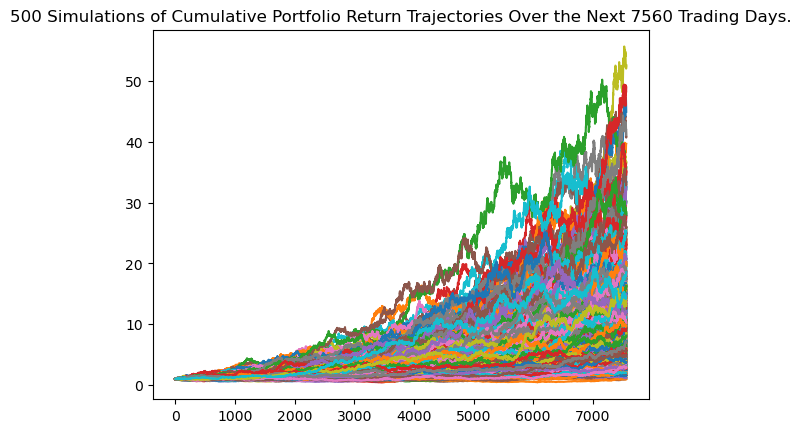

In [32]:
# Visualize the 30-year Monte Carlo simulation by creating an
# overlay line plot

Thirty_6040_line_plot = MC_30_6040.plot_simulation()

#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

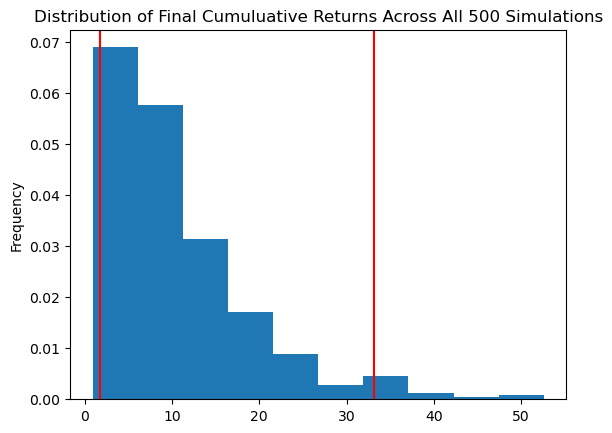

In [33]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram

Thirty_6040_distribution_plot = MC_30_6040.plot_distribution()

#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [34]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable

Thirty_6040_table = MC_30_6040.summarize_cumulative_return()

# Review the 30-year Monte Carlo summary statistics

print(Thirty_6040_table)

count           500.000000
mean             10.708528
std               8.138368
min               0.932595
25%               4.928699
50%               8.455198
75%              14.144911
max              52.591017
95% CI Lower      1.703135
95% CI Upper     33.165575
Name: 7560, dtype: float64


### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?


In [35]:
# Answer
#
#         95% CI Lower      1.703135
#         95% CI Upper     33.165575

In [36]:
# Print the current balance of the stock and bond portion of the members portfolio

display(total_portfolio)

105831.41399999999

In [37]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_thirty_6040_cumulative_return = round(Thirty_6040_table[8] * total_portfolio, 2)
ci_upper_thirty_6040_cumulative_return = round(Thirty_6040_table[9] * total_portfolio, 2)

# Print the result of your calculations

print(f"There is a 95% chance that an initial investment of {total_portfolio} in the 60/40 portfolio"
      f" with an even weight portfolio over the next {years} years will end within in the range of"
      f" ${ci_lower_thirty_6040_cumulative_return} and ${ci_upper_thirty_6040_cumulative_return}.")

There is a 95% chance that an initial investment of 105831.41399999999 in the 60/40 portfolio with an even weight portfolio over the next 30 years will end within in the range of $180245.14 and $3509959.74.


### Forecast Cumulative Returns in 10 Years

The CTO of the credit union is impressed with your work on these planning tools but wonders if 30 years is a long time to wait until retirement. So, your next task is to adjust the retirement portfolio and run a new Monte Carlo simulation to find out if the changes will allow members to retire earlier.

For this new Monte Carlo simulation, do the following: 

- Forecast the cumulative returns for 10 years from now. Because of the shortened investment horizon (30 years to 10 years), the portfolio needs to invest more heavily in the riskier asset&mdash;that is, stock&mdash;to help accumulate wealth for retirement. 

- Adjust the weights of the retirement portfolio so that the composition for the Monte Carlo simulation consists of 20% bonds and 80% stocks. 

- Run the simulation over 500 samples, and use the same data that the API call to Alpaca generated.

- Based on the new Monte Carlo simulation, answer the following questions in your Jupyter notebook:

    - Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

    - Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?


In [38]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 20% to AGG and 80% to SPY.
# Run 500 samples.

years = 10

samples = 500

MC_10_8020 = MCSimulation(
    portfolio_data = prices_df,
    weights = [.80,.20],
    num_simulation = samples,
    num_trading_days = 252 * years
)

# Review the simulation input data

MC_10_8020.portfolio_data.head()

SPY                                         \
                             open      high       low   close     volume   
timestamp                                                                  
2019-08-12 04:00:00+00:00  289.96  291.6052  287.0200  288.07   60895115   
2019-08-13 04:00:00+00:00  287.74  294.1500  287.3600  292.42  100693314   
2019-08-14 04:00:00+00:00  288.07  292.4644  283.7600  284.02  136293807   
2019-08-15 04:00:00+00:00  284.88  285.6400  282.3900  284.65  102128101   
2019-08-16 04:00:00+00:00  286.48  289.3300  284.7138  288.81   86075298   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2019-08-12 04:00:00+00:00      324202  288.889779          NaN  112.93   
2019-08-13 04:00:00+00:00      490220  292.076183     0.015100  113.15   
2019-08-14 04:00:00+00:00      677326  285.776096    -0.028726  113.28   
2019-08-15 04:00:00+00:00      533485  284.469402     0.002218  113.39   
2019-08-16 04:00:00+00:00      371928  288.239546     0.014614  113.57   

                                                                            \
                               high      low    close   volume trade_count   
timestamp                                                                    
2019-08-12 04:00:00+00:00  113.1850  112.870  113.065  2246369        8960   
2019-08-13 04:00:00+00:00  113.1504  112.785  112.890  3048591       13159   
2019-08-14 04:00:00+00:00  113.3800  113.210  113.240  2832001       13903   
2019-08-15 04:00:00+00:00  113.9100  113.370  113.760  2829081       14814   
2019-08-16 04:00:00+00:00  113.6850  113.360  113.670  5209018       19639   

                                                    
                                 vwap daily_return  
timestamp                                           
2019-08-12 04:00:00+00:00  113.035477          NaN  
2019-08-13 04:00:00+00:00  112.925793    -0.001548  
2019-08-14 04:00:00+00:00  113.298845     0.003100  
2019-08-15 04:00:00+00:00  113.608836     0.004592  
2019-08-16 04:00:00+00:00  113.594116    -0.000791

In [39]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns

MC_10_8020.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\Broth\FinTech\5Module5Challenge\RandyMiyazaki\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.021907,1.017812,1.002642,1.018081,1.011602,0.987926,0.968571,0.987416,0.981423,0.998363,...,0.974604,0.999782,1.022456,0.990839,1.019602,0.987565,0.994607,0.994479,1.004472,0.989224
2,1.030503,1.028986,0.994065,1.037910,0.997144,0.985838,0.963148,0.989557,0.996024,0.999670,...,0.994438,0.970180,0.995343,0.991823,1.026987,0.982747,0.992634,0.984016,0.995741,0.996852
3,1.022690,1.034041,0.999803,1.030689,0.978313,0.994411,0.974515,0.977869,0.994765,1.005552,...,0.992176,0.967681,0.975052,0.991586,1.029562,0.981496,0.989452,0.977459,0.985783,0.998543
4,1.027927,1.026877,0.967163,1.021003,0.981732,0.984249,0.972191,0.995676,0.971951,1.007288,...,0.996088,0.973398,0.990846,0.995230,1.022540,0.961294,0.995377,0.962237,0.983195,0.999876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.584493,2.473045,1.472025,1.207263,2.061349,3.161408,1.634006,3.813467,3.393619,3.159609,...,1.384600,2.038549,1.995410,5.383745,3.216518,2.849177,2.757144,3.472991,1.636009,1.370889
2517,1.566759,2.480132,1.493007,1.226426,2.042152,3.187954,1.635616,3.902750,3.374644,3.133421,...,1.384040,2.069131,2.005699,5.439353,3.188244,2.864560,2.796859,3.526156,1.648132,1.380450
2518,1.565771,2.430714,1.506772,1.229880,2.027179,3.188281,1.612529,3.889008,3.412379,3.173343,...,1.375583,2.041117,2.002105,5.547874,3.194359,2.868348,2.734555,3.522185,1.670649,1.391839
2519,1.580489,2.425694,1.517067,1.208675,2.050090,3.174492,1.613178,3.888708,3.417382,3.142581,...,1.393012,2.034363,1.994096,5.590735,3.149562,2.881774,2.748862,3.461377,1.665966,1.399467


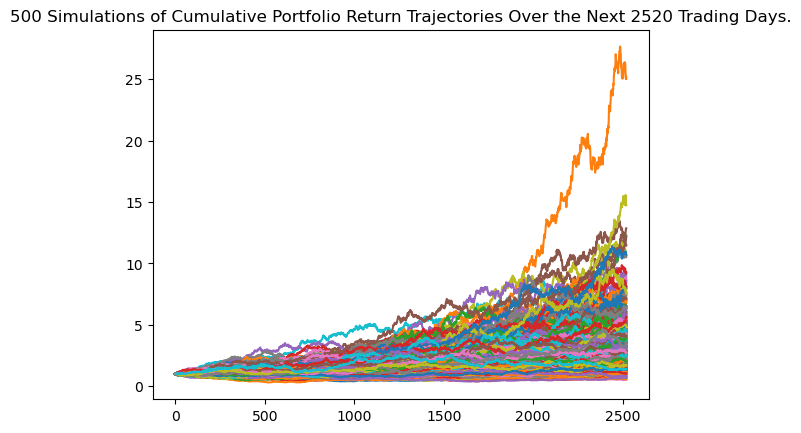

In [40]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot

Ten_8020_line_plot = MC_10_8020.plot_simulation()

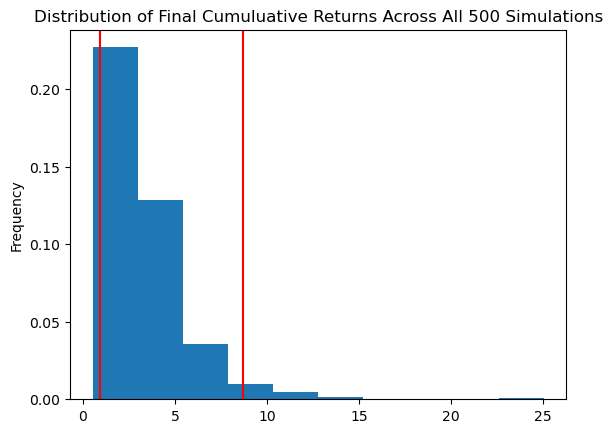

In [41]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram

Ten_8020_distribution_plot = MC_10_8020.plot_distribution()

In [42]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable

Ten_8020_table = MC_10_8020.summarize_cumulative_return()

# Review the 10-year Monte Carlo summary statistics

print(Ten_8020_table)

count           500.000000
mean              3.299888
std               2.271841
min               0.537439
25%               1.880095
50%               2.737034
75%               4.124980
max              25.040854
95% CI Lower      0.901012
95% CI Upper      8.672553
Name: 2520, dtype: float64


### Answer the following questions:

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [43]:
# ANSWER:
#
#        95% CI Lower      0.901012
#        95% CI Upper      8.672553

In [44]:
# Print the current balance of the stock and bond portion of the members portfolio

display(total_portfolio)

105831.41399999999

In [45]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio

Ten_8020_table = MC_10_8020.summarize_cumulative_return()

ci_lower_ten_8020_cumulative_return = round(Ten_8020_table[8] * total_portfolio, 2)
ci_upper_ten_8020_cumulative_return = round(Ten_8020_table[9] * total_portfolio, 2)

# Print the result of your calculations

print(f"There is a 95% chance that an initial investment of {total_portfolio} in the 80/20 portfolio"
      f" with an even weight portfolio over the next {years} years will end within in the range of"
      f" ${ci_lower_ten_8020_cumulative_return} and ${ci_upper_ten_8020_cumulative_return}.")

There is a 95% chance that an initial investment of 105831.41399999999 in the 80/20 portfolio with an even weight portfolio over the next 10 years will end within in the range of $95355.39 and $917828.56.


In [46]:
#
# Forecast 10 Years, 60% Stocks, 40% Bonds
#

years = 10

samples = 500

MC_10_6040 = MCSimulation(
    portfolio_data = prices_df,
    weights = [.60,.40],
    num_simulation = samples,
    num_trading_days = 252 * years
)

MC_10_6040.calc_cumulative_return()
Ten_6040_table = MC_10_6040.summarize_cumulative_return()

ci_lower_ten_6040_cumulative_return = round(Ten_6040_table[8] * total_portfolio, 2)
ci_upper_ten_6040_cumulative_return = round(Ten_6040_table[9] * total_portfolio, 2)

# Print the result of your calculations

print(f"There is a 95% chance that an initial investment of {total_portfolio} in the 60/40 portfolio"
      f" with an even weight portfolio over the next {years} years will end within in the range of"
      f" ${ci_lower_ten_6040_cumulative_return} and ${ci_upper_ten_6040_cumulative_return}.")

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\Broth\FinTech\5Module5Challenge\RandyMiyazaki\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?

In [47]:
# ANSWER:
#
#       YES. 10 Years at 80% Stocks and 60% Bonds are forecasted to kake more money than 10 Years at 60% Staocks and 40% Bonds:
#
#       95% CI Lower   95% CI Upper
#       ------------   ------------
#       $95,355.39 and $917,828.56    10yr/80%-20%
#       $95,823.78 and $507,341.78    10yr/60%-40%